## Statistical Modelling

Statistical modeling is a **mathematical approach that provides statistical methods** to analyze data and predict real-world behaviors, trends, and future outcomes.
- It involves creating a statistical model—a structured representation of relationships between variables, often expressed through mathematical equations. 
- If you're looking to learn how to perform statistical modeling, this guide is perfect for you. In this article, I'll walk you through the process of statistical modeling using Python step by step.

### What is Statistical Modelling? And How It’s Different From Machine Learning Model Training?

- **Statistical modelling** provides a mathematical framework to describe relationships between variables, often incorporating stochastic elements (randomness). Its primary focus is on inference—understanding how variables are interconnected and quantifying the influence of specific factors on outcomes.

- These models rely on assumptions about data distributions and the nature of relationships between variables. Common examples include linear regression, logistic regression, and analysis of variance (ANOVA).   

- **Unlike machine learning model training**, which emphasizes prediction accuracy, statistical modeling prioritizes inference. It aims to uncover underlying relationships between variables, quantify how predictors affect the response variable, and test hypotheses about these relationships.

- Whereas Machine Learning model training focuses on prediction. The primary goal is to create models that can make accurate predictions on new, unseen data. Machine learning often cares less about the ‘why’ of the data relationships and more about the ‘how well’ it can predict the outcome.

To explain the use of statistical modelling, I’ll take you through the task of statistical modelling of music features, where we will aim to identify what music features determine the popularity of music tracks. 

### Statistical Modelling using Python

Now, let’s get started with the task of statistical modelling of music features by importing the dataset and the necessary Python libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# load the dataset
music_data = pd.read_csv('C:/Users/asus/OneDrive/Desktop/Statistics_Datasets/musicdata.csv')
music_data.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Bijlee Bijlee,Harrdy Sandhu,Bijlee Bijlee,3tG0IGB24sRhGFLs5F1Km8,1iZLpuGMr4tn1F5bZu32Kb,70,2021-10-30,168450,False,...,0.670,1,-5.313,0,0.1430,0.2690,0.000000,0.0733,0.643,100.004
1,1,Expert Jatt,Nawab,Expert Jatt,2gibg5SCTep0wsIMefGzkd,7rr6n1NFIcQXCsi43P0YNl,65,2018-01-18,199535,False,...,0.948,6,-2.816,0,0.1990,0.2980,0.000000,0.0784,0.647,172.038
2,2,"Kaun Nachdi (From ""Sonu Ke Titu Ki Sweety"")","Guru Randhawa, Neeti Mohan",High Rated Gabru - Guru Randhawa,6EDbwGsQNQRLf73c7QwZ2f,3s7m0jmCXGcM8tmlvjCvAa,64,2019-03-02,183373,False,...,0.830,4,-3.981,0,0.0455,0.0357,0.000000,0.0419,0.753,127.999
3,3,Na Na Na Na,J Star,Na Na Na Na,4xBqgoiRSOMU1VlKuntVQW,5GjxbFTZAMhrVfVrNrrwrG,52,2015,209730,False,...,0.863,3,-3.760,1,0.0413,0.3760,0.000014,0.0916,0.807,95.000
4,4,Patiala Peg,Diljit Dosanjh,Do Gabru - Diljit Dosanjh & Akhil,1uxDllRe9CPhdr8rhz2QCZ,6TikcWOLRsPq66GBx2jk67,46,2018-07-10,188314,False,...,0.811,5,-3.253,0,0.1840,0.0259,0.000000,0.3110,0.835,175.910


**Let’s have a look at the column info and summary statistics before moving forward:**

In [2]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   Track Name        94 non-null     object 
 2   Artists           94 non-null     object 
 3   Album Name        94 non-null     object 
 4   Album ID          100 non-null    object 
 5   Track ID          100 non-null    object 
 6   Popularity        100 non-null    int64  
 7   Release Date      100 non-null    object 
 8   Duration (ms)     100 non-null    int64  
 9   Explicit          100 non-null    bool   
 10  External URLs     100 non-null    object 
 11  Danceability      100 non-null    float64
 12  Energy            100 non-null    float64
 13  Key               100 non-null    int64  
 14  Loudness          100 non-null    float64
 15  Mode              100 non-null    int64  
 16  Speechiness       100 non-null    float64
 17

In [3]:
music_data.describe()

,Unnamed: 0,Popularity,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,50.950000,210543.180000,0.767210,0.79763,4.54000,-4.399930,0.43000,0.115615,0.165559,0.005236,0.185791,0.659259,119.371470
std,29.011492,16.496326,37961.050214,0.085302,0.11572,3.64434,1.612703,0.49757,0.075819,0.152536,0.028979,0.170086,0.183901,29.058698
min,0.000000,0.000000,141862.000000,0.501000,0.47700,0.00000,-8.272000,0.00000,0.029400,0.001090,0.000000,0.034600,0.073900,78.991000
25%,24.750000,46.000000,186098.500000,0.714750,0.71125,1.00000,-5.465250,0.00000,0.057700,0.037500,0.000000,0.076900,0.558250,97.042500
50%,49.500000,56.500000,205076.000000,0.772000,0.81700,4.00000,-4.252500,0.00000,0.086150,0.128000,0.000000,0.122000,0.672500,107.984000
75%,74.250000,62.000000,226079.000000,0.826500,0.88125,7.25000,-3.163250,1.00000,0.160000,0.236750,0.000041,0.225250,0.793750,132.259000
max,99.000000,72.000000,367818.000000,0.959000,0.98800,11.00000,-0.223000,1.00000,0.340000,0.620000,0.270000,0.823000,0.940000,189.857000


In [4]:
music_data.isnull().sum()

Unnamed: 0          0
Track Name          6
Artists             6
Album Name          6
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

**Now let’s perform data cleaning on this data:**

In [5]:
# dropping the 'Unnamed: 0' column
music_data_cleaned = music_data.drop(columns=['Unnamed: 0'])

# handling missing values by filling them with placeholder text
columns_with_missing_values = ['Track Name', 'Artists', 'Album Name']
music_data_cleaned[columns_with_missing_values] = music_data_cleaned[columns_with_missing_values].fillna('Unknown')

In [6]:
music_data_cleaned

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Bijlee Bijlee,Harrdy Sandhu,Bijlee Bijlee,3tG0IGB24sRhGFLs5F1Km8,1iZLpuGMr4tn1F5bZu32Kb,70,2021-10-30,168450,False,https://open.spotify.com/track/1iZLpuGMr4tn1F5...,...,0.670,1,-5.313,0,0.1430,0.26900,0.000000,0.0733,0.643,100.004
1,Expert Jatt,Nawab,Expert Jatt,2gibg5SCTep0wsIMefGzkd,7rr6n1NFIcQXCsi43P0YNl,65,2018-01-18,199535,False,https://open.spotify.com/track/7rr6n1NFIcQXCsi...,...,0.948,6,-2.816,0,0.1990,0.29800,0.000000,0.0784,0.647,172.038
2,"Kaun Nachdi (From ""Sonu Ke Titu Ki Sweety"")","Guru Randhawa, Neeti Mohan",High Rated Gabru - Guru Randhawa,6EDbwGsQNQRLf73c7QwZ2f,3s7m0jmCXGcM8tmlvjCvAa,64,2019-03-02,183373,False,https://open.spotify.com/track/3s7m0jmCXGcM8tm...,...,0.830,4,-3.981,0,0.0455,0.03570,0.000000,0.0419,0.753,127.999
3,Na Na Na Na,J Star,Na Na Na Na,4xBqgoiRSOMU1VlKuntVQW,5GjxbFTZAMhrVfVrNrrwrG,52,2015,209730,False,https://open.spotify.com/track/5GjxbFTZAMhrVfV...,...,0.863,3,-3.760,1,0.0413,0.37600,0.000014,0.0916,0.807,95.000
4,Patiala Peg,Diljit Dosanjh,Do Gabru - Diljit Dosanjh & Akhil,1uxDllRe9CPhdr8rhz2QCZ,6TikcWOLRsPq66GBx2jk67,46,2018-07-10,188314,False,https://open.spotify.com/track/6TikcWOLRsPq66G...,...,0.811,5,-3.253,0,0.1840,0.02590,0.000000,0.3110,0.835,175.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Unknown,Unknown,Unknown,2jw92hf4mnISbYywvU3Anj,3OZr3vo7SmYpn5XqeQEAOM,0,0000,203207,False,https://open.spotify.com/track/3OZr3vo7SmYpn5X...,...,0.842,6,-4.109,1,0.0745,0.00814,0.000013,0.2120,0.915,156.051
96,Move Your Lakk,"Diljit Dosanjh, Badshah, Sonakshi Sinha",Move Your Lakk,0V06TMGQQQkvKxNmFlKyEj,3aYMKdSitJeHUCZO8Wt6fw,51,2017-03-29,194568,False,https://open.spotify.com/track/3aYMKdSitJeHUCZ...,...,0.816,2,-5.595,1,0.1480,0.03790,0.000153,0.1230,0.744,99.992
97,"Patola (From ""Blackmail"")","Guru Randhawa, Preet Hundal","Patola (From ""Blackmail"")",2XAAIDEpPb57NsKgAHLGVQ,17LZzRCY0iFWlDDuAG7BlM,57,2018-03-05,184410,False,https://open.spotify.com/track/17LZzRCY0iFWlDD...,...,0.901,3,-2.719,0,0.0508,0.12600,0.000000,0.0692,0.914,87.998
98,"Ban Ja Rani (From ""Tumhari Sulu"")",Guru Randhawa,High Rated Gabru - Guru Randhawa,6EDbwGsQNQRLf73c7QwZ2f,7cQtGVoPCK9DlspeYjdHOA,60,2019-03-02,225938,False,https://open.spotify.com/track/7cQtGVoPCK9Dlsp...,...,0.692,9,-4.718,0,0.0577,0.20600,0.000000,0.1240,0.487,102.015


In [7]:
music_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        100 non-null    object 
 1   Artists           100 non-null    object 
 2   Album Name        100 non-null    object 
 3   Album ID          100 non-null    object 
 4   Track ID          100 non-null    object 
 5   Popularity        100 non-null    int64  
 6   Release Date      100 non-null    object 
 7   Duration (ms)     100 non-null    int64  
 8   Explicit          100 non-null    bool   
 9   External URLs     100 non-null    object 
 10  Danceability      100 non-null    float64
 11  Energy            100 non-null    float64
 12  Key               100 non-null    int64  
 13  Loudness          100 non-null    float64
 14  Mode              100 non-null    int64  
 15  Speechiness       100 non-null    float64
 16  Acousticness      100 non-null    float64
 17

The data is now cleaned, and all missing values have been handled:
- The unnecessary Unnamed: 0 column has been removed.
- Missing values in the Track Name, Artists, and Album Name columns have been filled with “Unknown”.

Now, let’s examine the distribution of the Popularity score and then look at correlations between Popularity and other musical features. We’ll generate some plots to visualize these aspects:

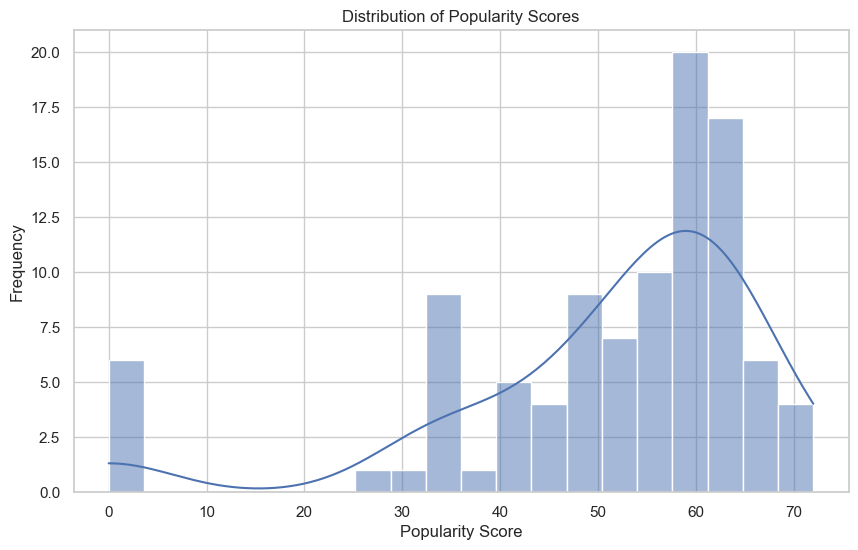

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# plotting the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(music_data_cleaned['Popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show();

- The distribution of popularity scores shows a range mainly between 40 to 70, with peaks around the 50s and 60s. 
- This indicates that most tracks in this dataset have moderate to high popularity.

Now, let’s have a look at the **correlation matrix:**

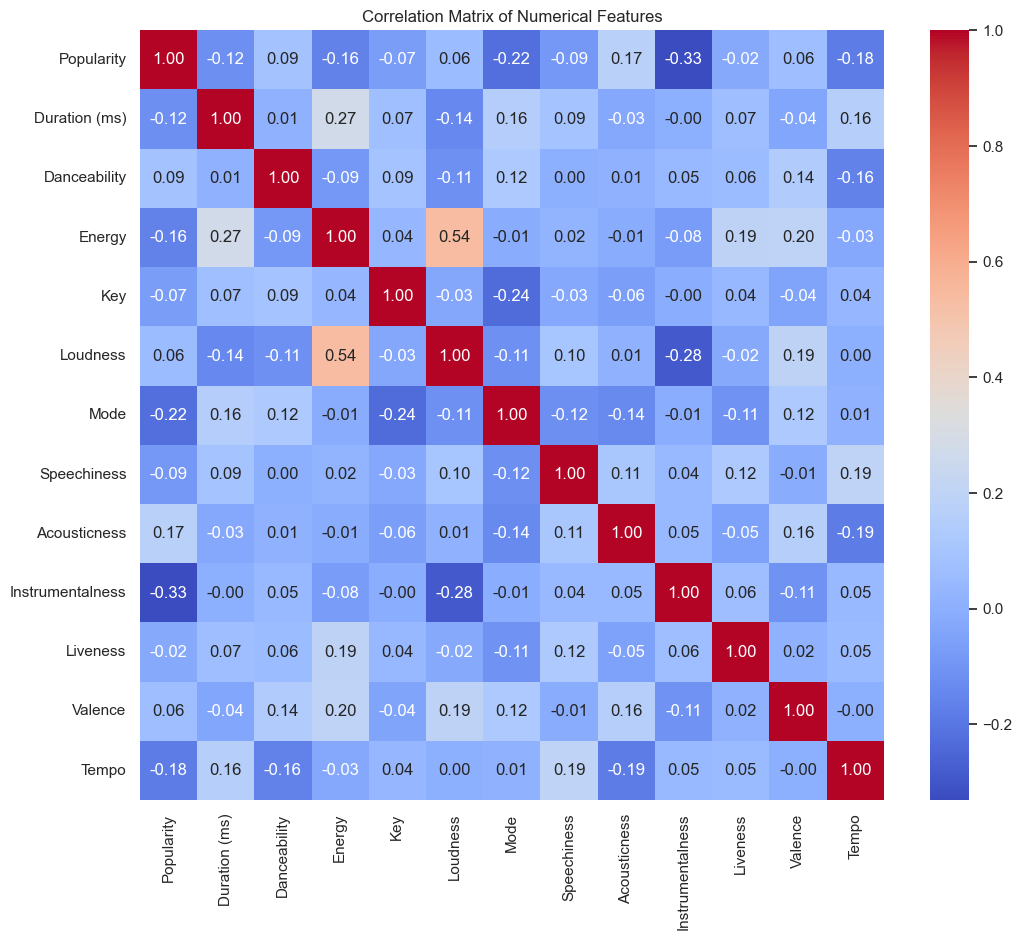

In [9]:
plt.figure(figsize=(12, 10))
correlation_matrix = music_data_cleaned.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show();

The heatmap reveals valuable insights into the relationships between various features and track popularity. Specifically, Popularity shows a positive correlation with Loudness and Energy, indicating that louder and more energetic tracks are generally more popular. 
- In contrast, Acousticness exhibits a slight negative correlation with popularity, suggesting that acoustic tracks tend to be less favored.

Additionally, **Danceability and Valence (a measure of the musical happiness or positivity) also show a positive correlation with popularity.** This implies that tracks with higher danceability and a happier tone are often more appealing to listeners.

To explore these relationships further, we will focus on how individual features impact track popularity. Based on our observations from the correlation matrix, we will analyze the following key features:

- **_Danceability vs. Popularity_**
- **_Energy vs. Popularity_**
- **_Loudness vs. Popularity_**
- **_Acousticness vs. Popularity_**
- **_Valence vs. Popularity_**

For each feature, we will create scatter plots to visualize their relationship with popularity, providing deeper insights into how these attributes influence the appeal of music tracks.

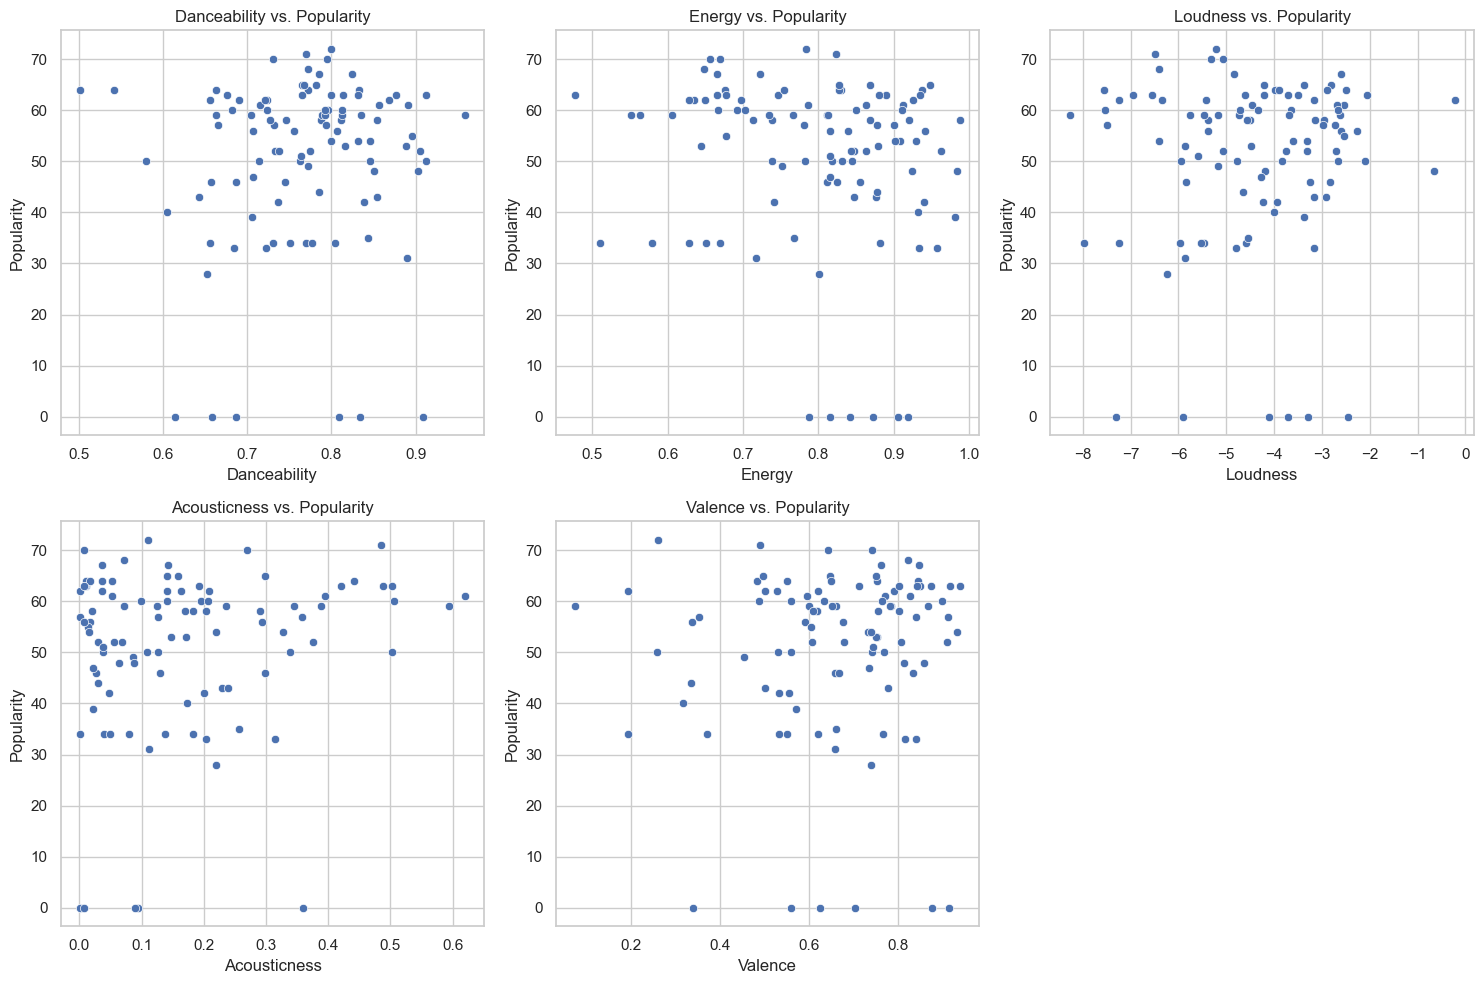

In [10]:
# creating scatter plots for various features vs. popularity
features = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Valence']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=music_data_cleaned[feature], y=music_data_cleaned['Popularity'])
    plt.title(f'{feature} vs. Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

plt.tight_layout()
plt.show();

Here are the scatter plots visualizing the relationships between various musical features and the popularity of tracks:

- **_Danceability vs. Popularity_:** Higher danceability scores tend to correlate with moderate to high popularity. This suggests that more danceable tracks are generally more popular.

- **_Energy vs. Popularity_:** Similar to danceability, higher energy levels in tracks often correlate with higher popularity. This aligns with the trend that energetic tracks are preferred by listeners.

- **_Loudness vs. Popularity_:** There’s a trend showing that louder tracks tend to have higher popularity scores. This might reflect listener preference for more vibrant and powerful sound profiles.

- **_Acousticness vs. Popularity_:** Acousticness shows a somewhat inverse relationship with popularity, where tracks with lower acousticness tend to be more popular. This could suggest that highly acoustic tracks are less favoured in the dataset’s music genre context.

- **_Valence vs. Popularity_:** Tracks with higher valence, which indicates a happier or more positive tone, show a slight tendency towards higher popularity. This might imply that listeners prefer tracks that have a positive emotional tone.

Now, let’s have a look at how danceability, energy, and other features impact popularity differently when the track is explicit versus when it’s not. This can reveal whether explicit content has a modifying effect on the relationship between audio features and popularity:

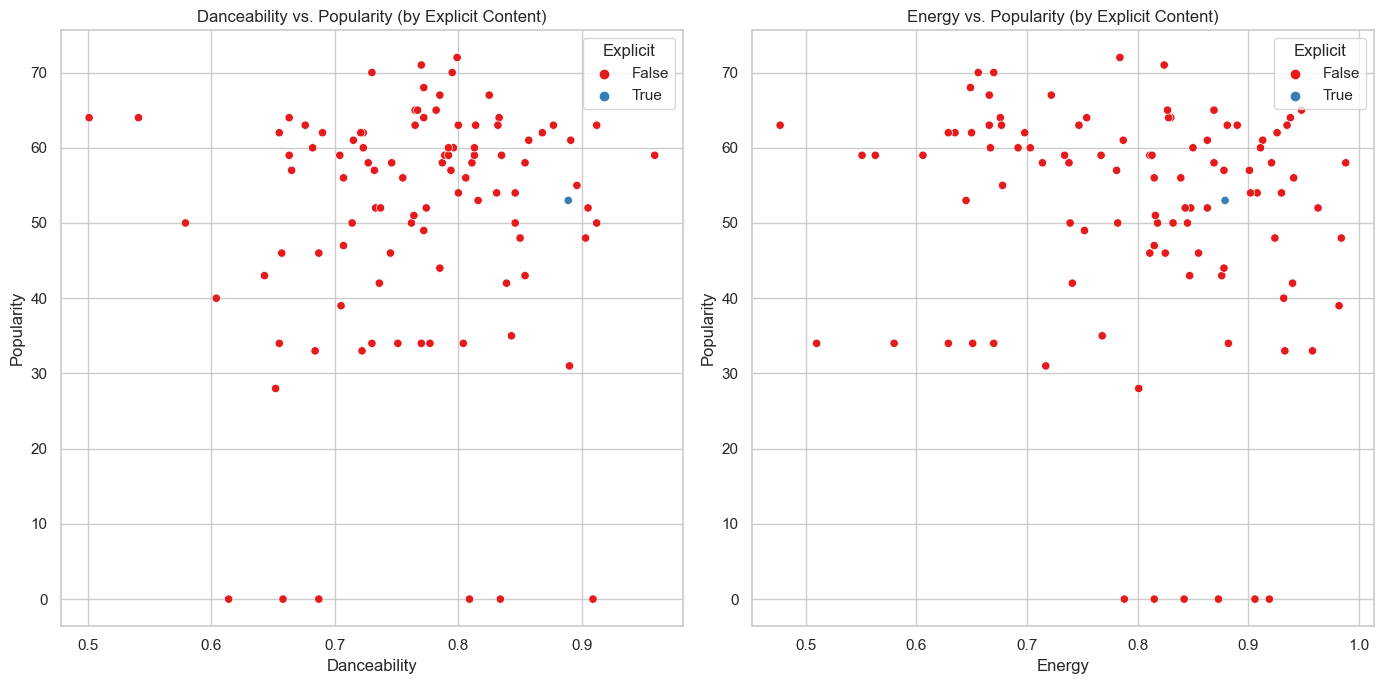

In [11]:
# creating plots for danceability vs. popularity and energy vs. popularity, segmented by explicit content
plt.figure(figsize=(14, 7))

# danceability vs. popularity
plt.subplot(1, 2, 1)
sns.scatterplot(x='Danceability', y='Popularity', hue='Explicit', data=music_data_cleaned, palette='Set1')
plt.title('Danceability vs. Popularity (by Explicit Content)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

# energy vs. popularity
plt.subplot(1, 2, 2)
sns.scatterplot(x='Energy', y='Popularity', hue='Explicit', data=music_data_cleaned, palette='Set1')
plt.title('Energy vs. Popularity (by Explicit Content)')
plt.xlabel('Energy')
plt.ylabel('Popularity')

plt.tight_layout()
plt.show();

**The segmented scatter plots for Danceability vs. Popularity and Energy vs. Popularity, divided by whether tracks are explicit or not, show some interesting trends:**

- **_Danceability vs. Popularity:_** Both explicit and non-explicit tracks show a positive trend between danceability and popularity. However, explicit tracks tend to cluster slightly higher on the popularity scale at similar levels of danceability compared to non-explicit tracks.

- **_Energy vs. Popularity:_** Similar to danceability, there’s a generally positive relationship between energy and popularity for both explicit and non-explicit tracks. Explicit tracks appear to achieve higher popularity at lower energy levels compared to non-explicit tracks, suggesting that the explicit content may appeal to certain listener groups more, irrespective of energy level.

Now, let’s quantitatively assess the impact of various features on the popularity of music tracks using statistical modelling. We can use a regression model. This will allow us to understand which features are significant predictors of popularity, and quantify their impact.

- For statistical modelling, we’ll use features that show promising relationships and convert categorical data (like Explicit) into a format suitable for regression analysis. We’ll also include the Key and Mode as they might carry additional information about the musical properties of the tracks.

**Let’s start by preparing the features and setting up our dataset for statistical modelling using Linear Regression:**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# preparing the dataset for regression
# convert 'Explicit' from boolean to integer (0 or 1)
music_data_cleaned['Explicit'] = music_data_cleaned['Explicit'].astype(int)

# selecting features and target for the model
features = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Valence', 'Explicit', 'Key', 'Mode', 'Speechiness', 'Instrumentalness', 'Tempo']
X = music_data_cleaned[features]
y = music_data_cleaned['Popularity']

# standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predicting on the test set
y_pred = model.predict(X_test)

# evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# outputting the coefficients and performance metrics
coefficients = pd.Series(model.coef_, index=features)
coefficients

Danceability        1.249640e+00
Energy             -3.204815e+00
Loudness            1.141456e+00
Acousticness        2.469403e+00
Valence             2.125671e+00
Explicit           -3.108624e-14
Key                -3.189486e+00
Mode               -5.859715e+00
Speechiness         3.398224e-02
Instrumentalness    3.390750e-01
Tempo              -1.865736e+00
dtype: float64

**The output above represents the coefficients from the regression model quantifying the impact of various musical features on track popularity.**
- A positive coefficient indicates that an increase in the feature is associated with an increase in popularity, and vice versa for a negative coefficient.
- For instance, **Danceability (1.249640), Loudness (1.141456), Acousticness (2.469403), and Valence (2.125671)** all have positive coefficients, suggesting that tracks with higher values in these features tend to be more popular.
- On the contrary, **Energy (-3.204815), Key (-3.189486), Mode (-5.859715), and Tempo (-1.865736)** are negatively associated with popularity, indicating that higher values in these features could lead to lower popularity.
- The coefficients for **Explicit (1.620926e-14) and Speechiness (0.03398224)** suggest a negligible impact on the popularity, with Explicit essentially having no effect. **Instrumentalness (0.3390750)** shows a minor positive influence.

### Summary

So, Statistical modelling is a mathematical framework used to describe the relationships between variables in the form of equations, usually involving stochastic elements (randomness). It is primarily focused on inference, which means understanding the relationships between variables and quantifying how certain factors influence outcomes.